<a href="https://colab.research.google.com/github/190-785/LAB/blob/main/Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("/content/diabetes_dataset.csv").drop(columns=['Unnamed: 0'])

Sample of PCA-transformed data with cluster labels:


,PC1,PC2,Cluster
0,1.268852,-0.159468,2
1,-1.213174,0.472323,0
2,1.418374,1.441077,2
3,-1.279939,1.422603,1
4,1.531304,-1.504230,2



Cluster sizes:


,Count
Cluster,
0,3307
1,1688
2,5005


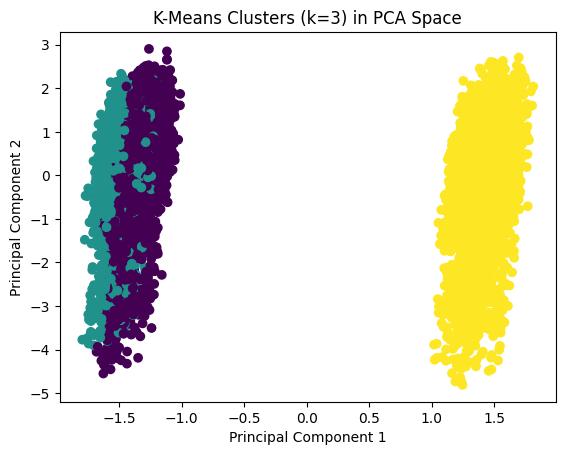

Explained variance ratio by PC1 and PC2: [0.067, 0.052]


In [10]:
categorical_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display sample of PCA + clusters
print("Sample of PCA-transformed data with cluster labels:")
display(pca_df.head())

# Display cluster counts
cluster_counts = pca_df['Cluster'].value_counts().sort_index()
print("\nCluster sizes:")
display(cluster_counts.to_frame(name='Count'))

# Plot the clusters
plt.figure()
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (k=3) in PCA Space')
plt.show()

# Explained variance
evr = pca.explained_variance_ratio_
print(f"Explained variance ratio by PC1 and PC2: [{evr[0]:.3f}, {evr[1]:.3f}]")

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Load data
df = pd.read_csv('diabetes_dataset.csv')  # adjust path as needed

# 2) Create proxy label
df['Diabetes_Proxy'] = (
    (df['Fasting_Blood_Glucose'] >= 126) |
    (df['HbA1c'] >= 6.5)
).astype(int)

# 3) Drop any index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# 4) One-hot encode all object-type columns at once
X = pd.get_dummies(df.drop(columns=['Diabetes_Proxy']))

# 5) Scale everything
X_scaled = StandardScaler().fit_transform(X)

# 6) K-Means with k=2
km = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
labels = km.labels_

# 7) Align clusters to proxy label
orig_acc = accuracy_score(df['Diabetes_Proxy'], labels)
flip_acc = accuracy_score(df['Diabetes_Proxy'], 1 - labels)
if flip_acc > orig_acc:
    labels = 1 - labels
    best_acc = flip_acc
else:
    best_acc = orig_acc

# 8) Report
print(f"K-Means (k=2) on all features → accuracy: {best_acc:.3f}\n")

# Confusion matrix
cm = confusion_matrix(df['Diabetes_Proxy'], labels)
cm_df = pd.DataFrame(
    cm,
    index=['True Non-Diabetic', 'True Diabetic'],
    columns=['Pred Non-Diabetic', 'Pred Diabetic']
)
print("Confusion Matrix:\n", cm_df, "\n")

# Classification metrics
print("Classification Report:\n",
      classification_report(df['Diabetes_Proxy'], labels))


K-Means (k=2) on all features → accuracy: 0.503

Confusion Matrix:
                    Pred Non-Diabetic  Pred Diabetic
True Non-Diabetic                489            464
True Diabetic                   4506           4541 

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.51      0.16       953
           1       0.91      0.50      0.65      9047

    accuracy                           0.50     10000
   macro avg       0.50      0.51      0.41     10000
weighted avg       0.83      0.50      0.60     10000



In [8]:
import pandas as pd
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# 3) Create proxy diabetes label
df['Diabetes_Proxy'] = (
    (df['Fasting_Blood_Glucose'] >= 126) |
    (df['HbA1c'] >= 6.5)
).astype(int)

# 4) Prepare features
df_feat = df.drop(columns=['Unnamed: 0', 'Diabetes_Proxy'], errors='ignore')
cat_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level', 'Alcohol_Consumption', 'Smoking_Status']
X = pd.get_dummies(df_feat, columns=cat_cols)
X_scaled = StandardScaler().fit_transform(X)

# 5) Fit K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
labels = kmeans.labels_

# 6) Align cluster labels to proxy labels for maximal accuracy
acc1 = accuracy_score(df['Diabetes_Proxy'], labels)
acc2 = accuracy_score(df['Diabetes_Proxy'], 1 - labels)
if acc2 > acc1:
    labels = 1 - labels
    best_acc = acc2
else:
    best_acc = acc1

# 7) Compute confusion matrix and classification report
cm = confusion_matrix(df['Diabetes_Proxy'], labels)
cm_df = pd.DataFrame(cm, index=['True Non-Diabetic', 'True Diabetic'],
                     columns=['Pred Non-Diabetic', 'Pred Diabetic'])

print(f"Best clustering accuracy: {best_acc:.3f}\n")
print("Confusion Matrix:")
display(cm_df)
print("\nClassification Report:")
print(classification_report(df['Diabetes_Proxy'], labels))

Best clustering accuracy: 0.547

Confusion Matrix:


,Pred Non-Diabetic,Pred Diabetic
True Non-Diabetic,435,518
True Diabetic,4009,5038



Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.46      0.16       953
           1       0.91      0.56      0.69      9047

    accuracy                           0.55     10000
   macro avg       0.50      0.51      0.43     10000
weighted avg       0.83      0.55      0.64     10000



In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Load your CSV (adjust filename/path as needed)
df = pd.read_csv('diabetes_dataset.csv')  # e.g. 'diabetes_dataset.csv'

# 2) Engineer the binary proxy label
df['Diabetes_Proxy'] = (
    (df['Fasting_Blood_Glucose'] >= 126) |
    (df['HbA1c'] >= 6.5)
).astype(int)

# 3) Drop any unwanted columns (e.g. index)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# 4) One-hot encode categoricals
cat_cols = ['Sex', 'Ethnicity', 'Physical_Activity_Level',
            'Alcohol_Consumption', 'Smoking_Status']
X = pd.get_dummies(df.drop(columns=['Diabetes_Proxy']), columns=cat_cols)

# 5) Standard‐scale everything
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Fit K-Means with k=2
km = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
labels = km.labels_

# 7) Align cluster ↔ proxy label for maximal accuracy
acc_orig = accuracy_score(df['Diabetes_Proxy'], labels)
acc_flipped = accuracy_score(df['Diabetes_Proxy'], 1 - labels)
if acc_flipped > acc_orig:
    labels = 1 - labels
    best_acc = acc_flipped
else:
    best_acc = acc_orig

# 8) Report performance
print(f"K-Means (k=2) best accuracy vs proxy: {best_acc:.3f}\n")

# Confusion matrix
cm = confusion_matrix(df['Diabetes_Proxy'], labels)
cm_df = pd.DataFrame(
    cm,
    index=['True Non-Diabetic', 'True Diabetic'],
    columns=['Pred Non-Diabetic', 'Pred Diabetic']
)
print("Confusion Matrix:")
print(cm_df, "\n")

# Classification metrics
print("Classification Report:")
print(classification_report(df['Diabetes_Proxy'], labels))


K-Means (k=2) best accuracy vs proxy: 0.503

Confusion Matrix:
                   Pred Non-Diabetic  Pred Diabetic
True Non-Diabetic                489            464
True Diabetic                   4506           4541 

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.51      0.16       953
           1       0.91      0.50      0.65      9047

    accuracy                           0.50     10000
   macro avg       0.50      0.51      0.41     10000
weighted avg       0.83      0.50      0.60     10000



In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('diabetes_dataset.csv')
df['Proxy'] = ((df.Fasting_Blood_Glucose >= 126) | (df.HbA1c >= 6.5)).astype(int)

# 1) Numeric matrix
X_num = df[['Age','BMI','Fasting_Blood_Glucose','HbA1c']]

# 2) Scale
X_scaled = StandardScaler().fit_transform(X_num)

# 3) k=2 clustering
km = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
labels = km.labels_

# 4) Align & evaluate
if accuracy_score(df.Proxy, 1-labels) > accuracy_score(df.Proxy, labels):
    labels = 1-labels

print("Accuracy:", accuracy_score(df.Proxy, labels))
print("Confusion matrix:\n",
      confusion_matrix(df.Proxy, labels))
print("\nReport:\n", classification_report(df.Proxy, labels))


Accuracy: 0.5034
Confusion matrix:
 [[ 526  427]
 [4539 4508]]

Report:
               precision    recall  f1-score   support

           0       0.10      0.55      0.17       953
           1       0.91      0.50      0.64      9047

    accuracy                           0.50     10000
   macro avg       0.51      0.53      0.41     10000
weighted avg       0.84      0.50      0.60     10000



In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) Load your dataset (adjust filename/path if needed)
df = pd.read_csv('diabetes_dataset.csv')

# 2) Create the proxy diabetes label
df['Diabetes_Proxy'] = (
    (df['Fasting_Blood_Glucose'] >= 126) |
    (df['HbA1c'] >= 6.5)
).astype(int)

# 3) Drop any index column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# 4) One-hot encode every categorical column automatically
X = pd.get_dummies(df.drop(columns=['Diabetes_Proxy']))
y = df['Diabetes_Proxy']

# 5) Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

# 7) Train a simple Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8) Print evaluation metrics
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.970

Confusion Matrix:
[[ 234   52]
 [  38 2676]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       286
           1       0.98      0.99      0.98      2714

    accuracy                           0.97      3000
   macro avg       0.92      0.90      0.91      3000
weighted avg       0.97      0.97      0.97      3000

